In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
pip install feature_engine

^C
Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
plt.style.use("ggplot")

In [69]:
# Preprocesado y modelado
# ==============================================================================
import feature_engine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import xgboost as xgb

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [74]:
df= pd.read_csv('stroke_dataset.csv')
df.head(5)
df["smoking_status"].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

* Este dataset tiene un total de 4981 entradas y 11 variables, entre ellas la variable a predecir (stroke).

* No haydtos nulos en ninguna de las filas o columnas del dataset.

In [13]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))


gender --------------------------> 2
age --------------------------> 104
hypertension --------------------------> 2
heart_disease --------------------------> 2
ever_married --------------------------> 2
work_type --------------------------> 4
Residence_type --------------------------> 2
avg_glucose_level --------------------------> 3895
bmi --------------------------> 342
smoking_status --------------------------> 4
stroke --------------------------> 2


In [14]:
df.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [15]:
df.hypertension.value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

In [16]:
df.heart_disease.value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [17]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [18]:
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Transformación de variables a bol & int

In [20]:
df[["gender", "hypertension", "heart_disease"  , "ever_married" , "Residence_type" ]] = df[["gender", "hypertension", "heart_disease" ,  "ever_married" , "Residence_type"]].astype('bool').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int32  
 3   heart_disease      4981 non-null   int32  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(1), object(2)
memory usage: 330.9+ KB


In [21]:
df.age.round()

0       67.0
1       80.0
2       49.0
3       79.0
4       81.0
        ... 
4976    41.0
4977    40.0
4978    45.0
4979    40.0
4980    80.0
Name: age, Length: 4981, dtype: float64

In [22]:
df[["age"]]= df[["age"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   int32  
 2   hypertension       4981 non-null   int32  
 3   heart_disease      4981 non-null   int32  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int32(6), int64(1), object(2)
memory usage: 311.4+ KB


In [23]:
df.age.describe()

count    4981.000000
mean       43.408552
std        22.683945
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [24]:
df.age.describe().round(2)

count    4981.00
mean       43.41
std        22.68
min         0.00
25%        25.00
50%        45.00
75%        61.00
max        82.00
Name: age, dtype: float64

In [25]:
numericas = ["age", "avg_glucose_level" , "bmi"]
numericas

['age', 'avg_glucose_level', 'bmi']

In [26]:
binarias = ["gender", "hypertension", "heart_disease"  , "ever_married" , "Residence_type" ]
binarias

['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

In [27]:
categoricas= ["work_type" , "smoking_status"]
categoricas

['work_type', 'smoking_status']

In [28]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [29]:
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   int32  
 2   hypertension       4981 non-null   int32  
 3   heart_disease      4981 non-null   int32  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int32(6), int64(1), object(2)
memory usage: 311.4+ KB


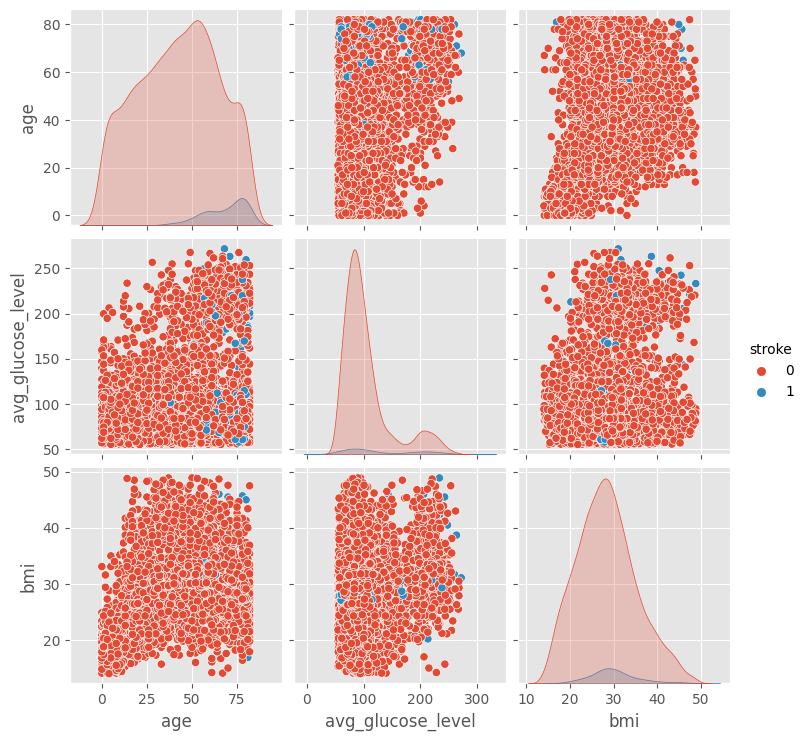

In [31]:
sns.pairplot(df, hue='stroke', vars=[ "age", "avg_glucose_level" , "bmi"])  

In [32]:
#como graficar estas variables binarias? catplots?
columns=["gender", "hypertension", "heart_disease"  , "ever_married" , "Residence_type" ]

In [33]:
df[numericas].columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

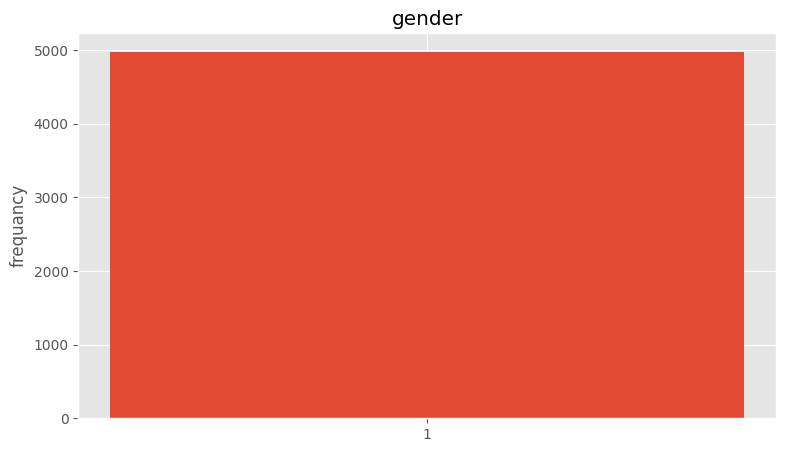

gender: 
 1    4981
Name: gender, dtype: int64


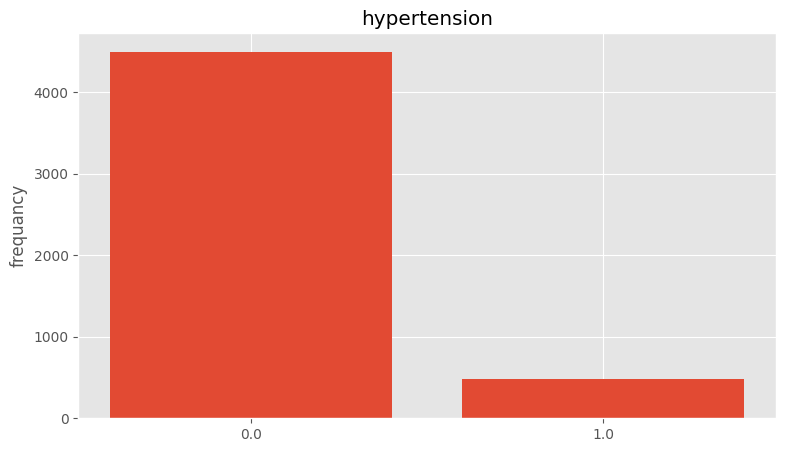

hypertension: 
 0.0    4502
1.0     479
Name: hypertension, dtype: int64


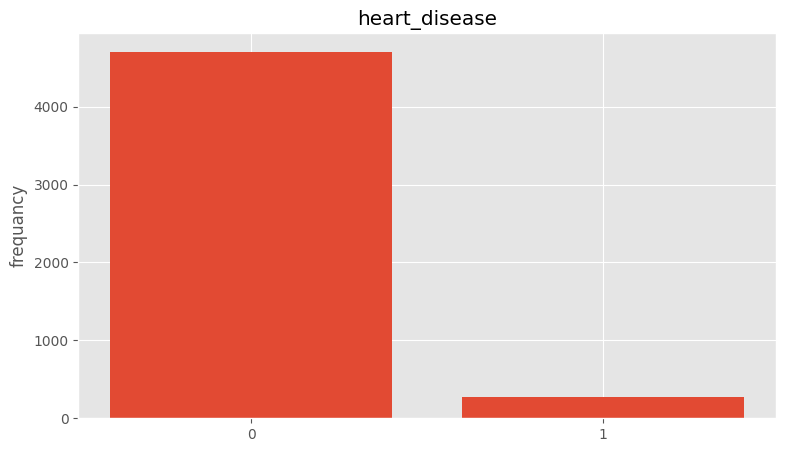

heart_disease: 
 0    4706
1     275
Name: heart_disease, dtype: int64


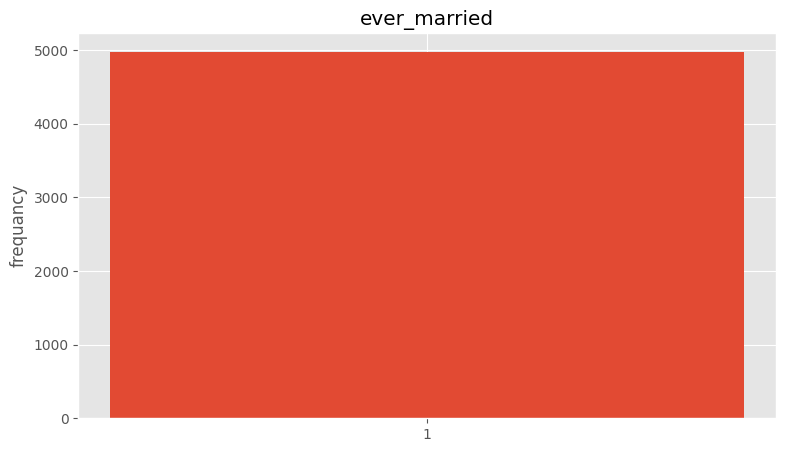

ever_married: 
 1    4981
Name: ever_married, dtype: int64


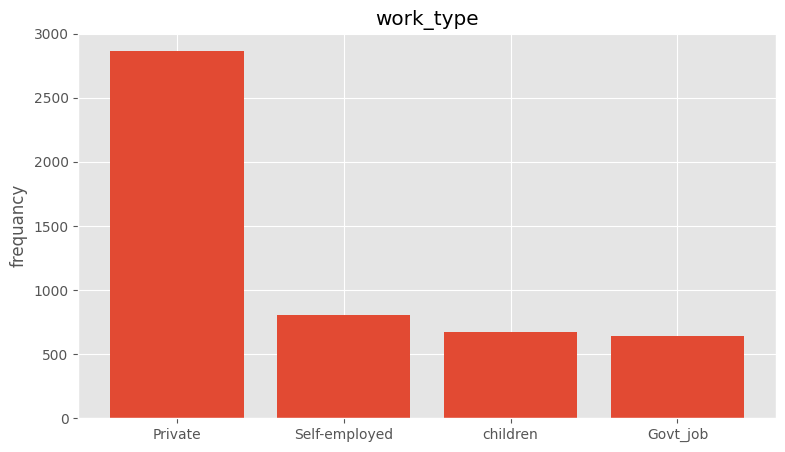

work_type: 
 Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64


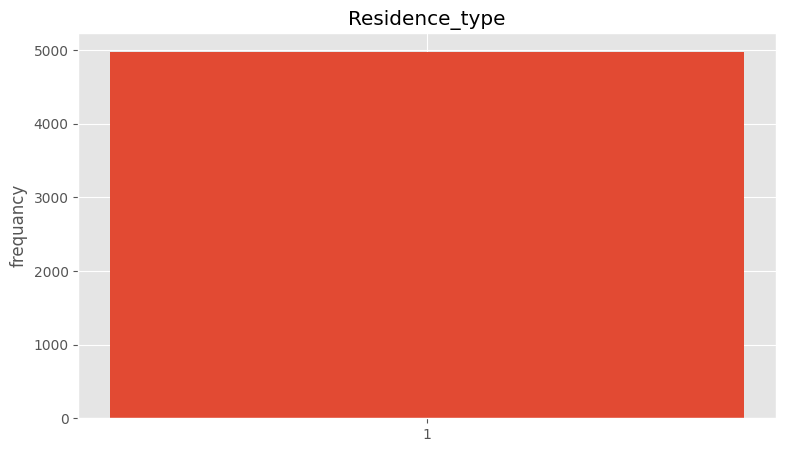

Residence_type: 
 1    4981
Name: Residence_type, dtype: int64


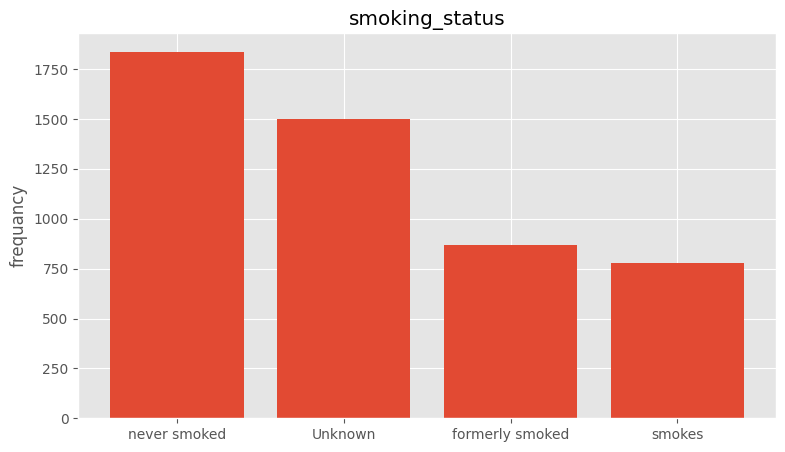

smoking_status: 
 never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


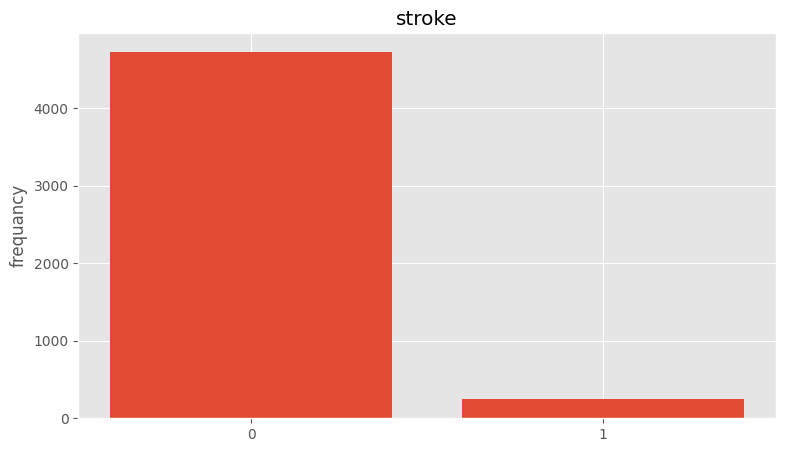

stroke: 
 0    4733
1     248
Name: stroke, dtype: int64


In [64]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9, 5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequancy")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
category1 = ["gender","hypertension","heart_disease","ever_married","work_type",
              "Residence_type","smoking_status","stroke"]
for i in category1:
    bar_plot(i)


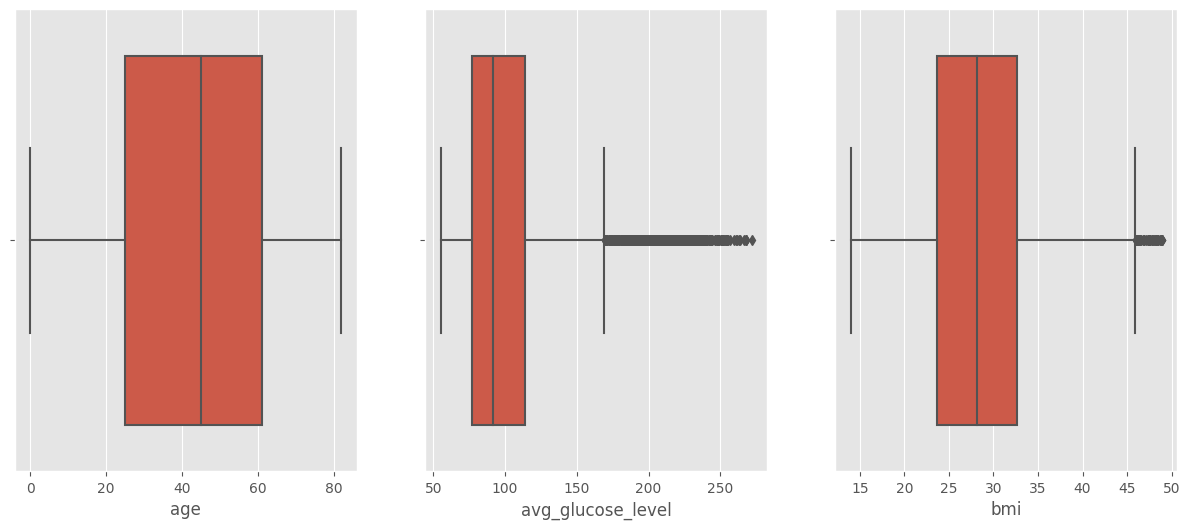

In [43]:
columns=['age', 'avg_glucose_level', 'bmi']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(15,6))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sns.boxplot(data=df[numericas], x=columns[i], ax=ax[i])
    
plt.show()

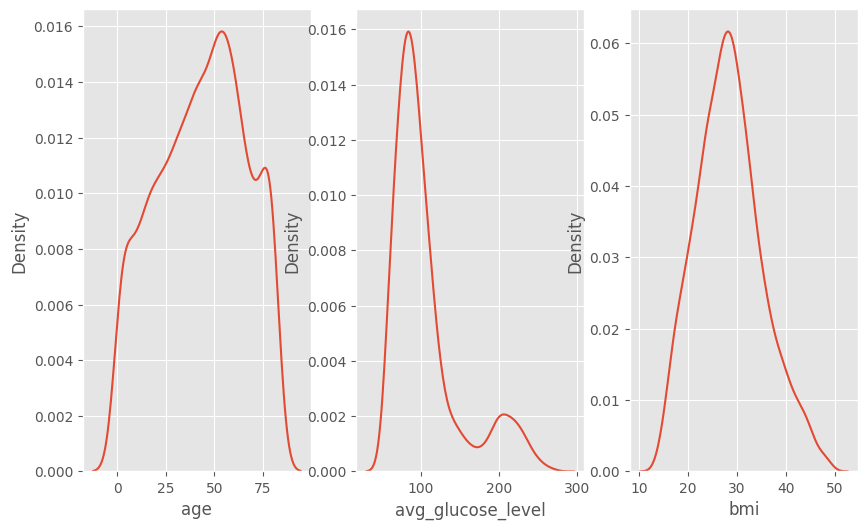

In [39]:
columns=['age', 'avg_glucose_level', 'bmi']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(10,6))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sns.kdeplot(data=df[numericas], x=columns[i], ax=ax[i])
plt.show()